In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import boxcox,yeojohnson
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('glass indentification')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.shape

(214, 10)

In [4]:
df.shape[0]

214

In [5]:
df.shape[1]

10

In [6]:
df.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<Axes: >

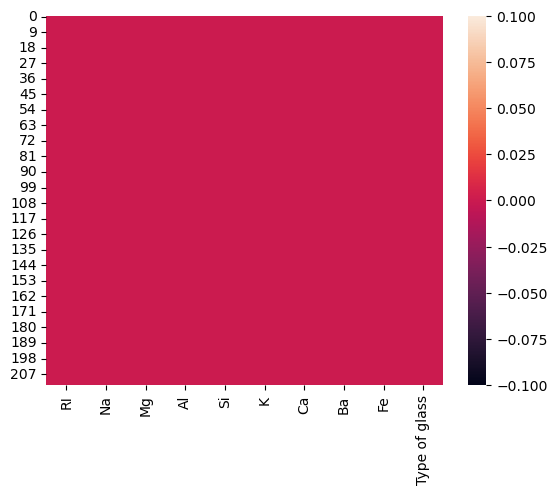

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [12]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [13]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [14]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [15]:
df['Type of glass'].nunique()

6

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


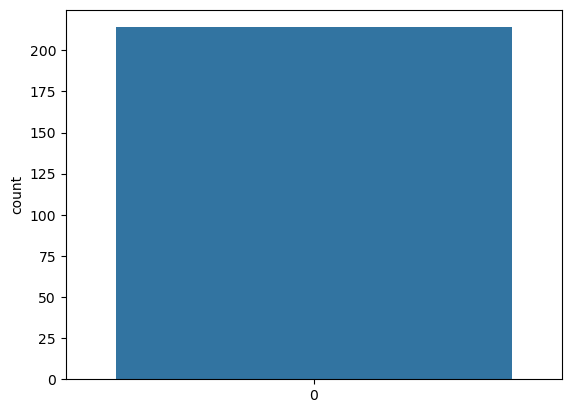

In [16]:
sns.countplot(df['Type of glass'])
print(df['Type of glass'].value_counts())

In [17]:
df['Type of glass'].replace([1,2,3,4,5,6,7],[0,0,0,0,1,1,1],inplace=True)

In [18]:
df['Type of glass'].unique()

array([0, 1], dtype=int64)

0    163
1     51
Name: Type of glass, dtype: int64 

0    76.168224
1    23.831776
Name: Type of glass, dtype: float64


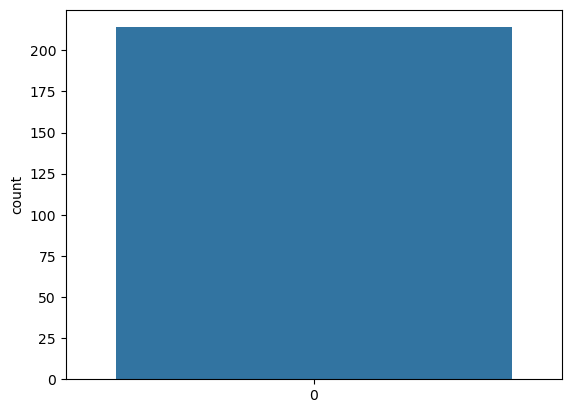

In [19]:
sns.countplot(df['Type of glass'])
print(df['Type of glass'].value_counts(),'\n')
print(df['Type of glass'].value_counts(normalize=True)*100)

In [20]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [21]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

<Axes: xlabel='RI', ylabel='Count'>

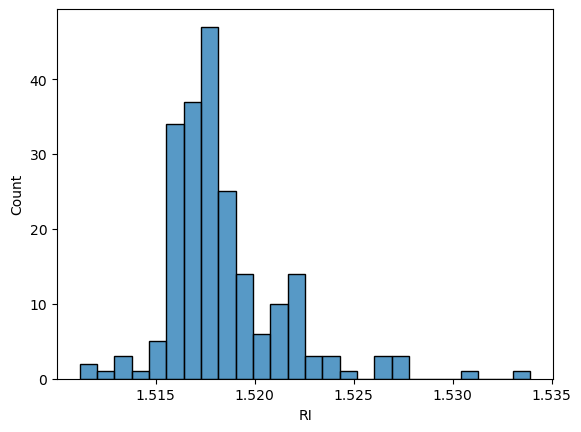

In [22]:
sns.histplot(df['RI'])

<Axes: xlabel='Na', ylabel='Count'>

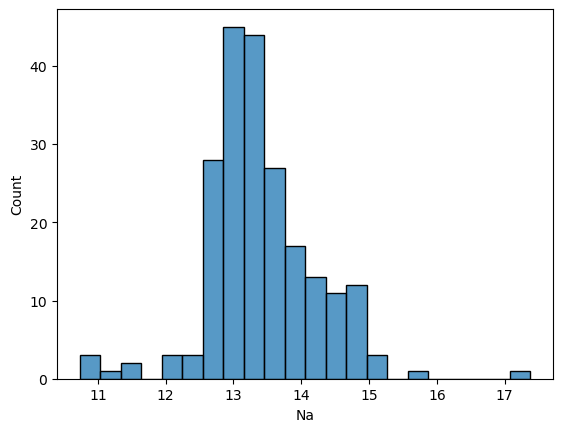

In [23]:
sns.histplot(df['Na'])

<Axes: xlabel='Mg', ylabel='Count'>

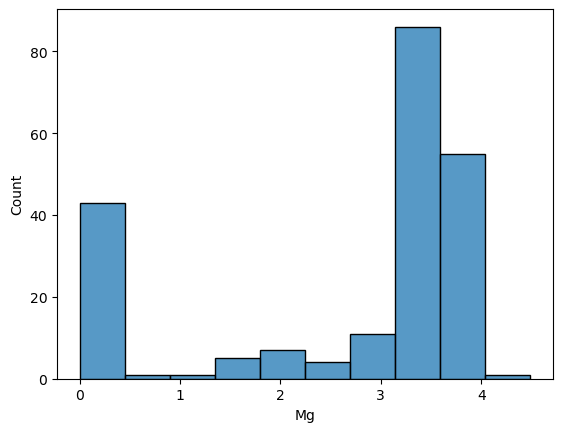

In [24]:
sns.histplot(df['Mg'])

<Axes: xlabel='Al', ylabel='Count'>

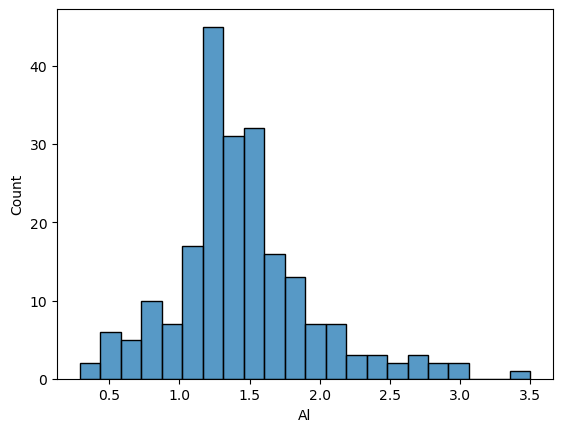

In [25]:
sns.histplot(df['Al'])

<Axes: xlabel='Si', ylabel='Count'>

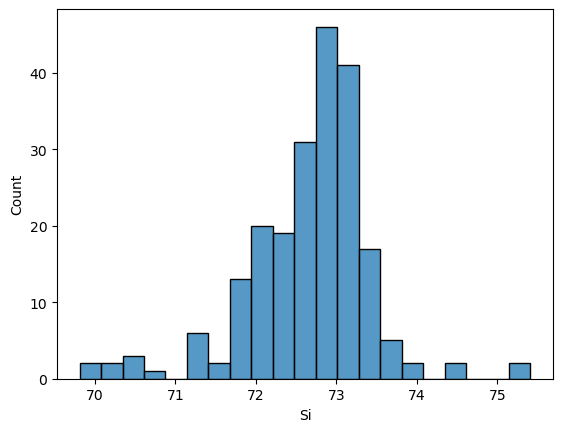

In [26]:
sns.histplot(df['Si'])

<Axes: xlabel='K', ylabel='Count'>

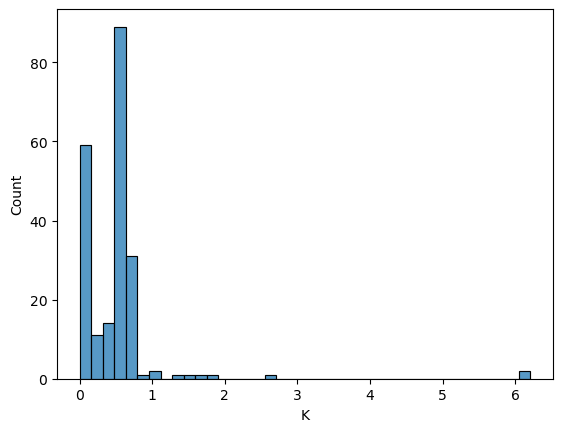

In [27]:
sns.histplot(df['K'])

<Axes: xlabel='Ca', ylabel='Count'>

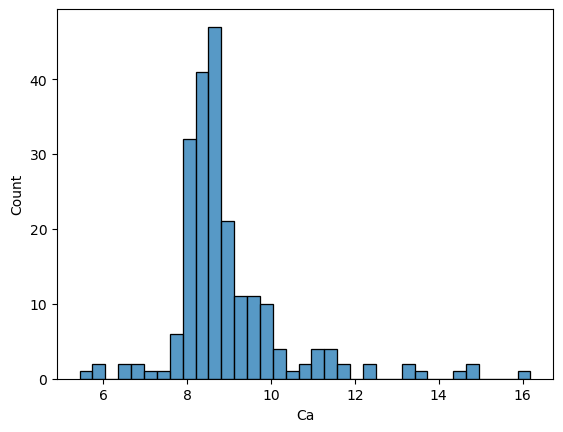

In [28]:
sns.histplot(df['Ca'])

<Axes: xlabel='Ba', ylabel='Count'>

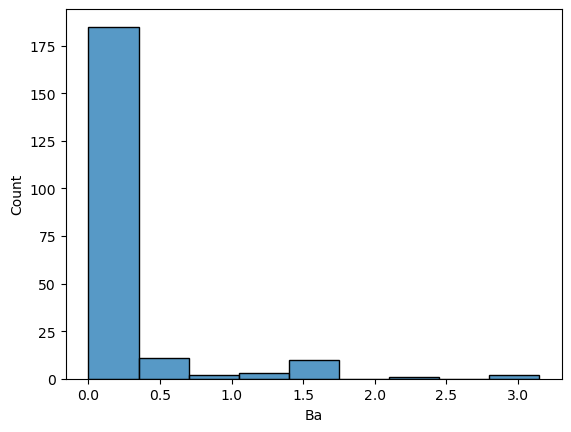

In [29]:
sns.histplot(df['Ba'])

<Axes: xlabel='Fe', ylabel='Count'>

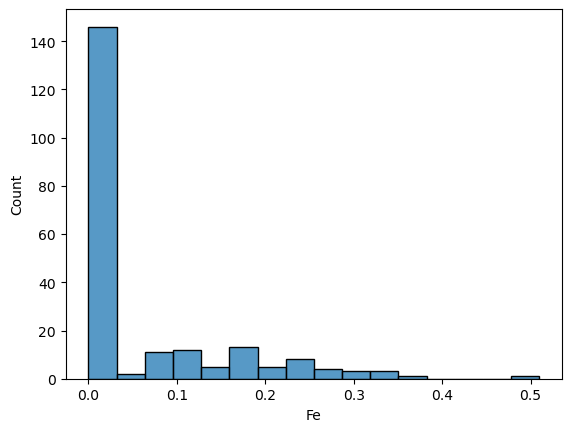

In [30]:
sns.histplot(df['Fe'])

<Axes: ylabel='count'>

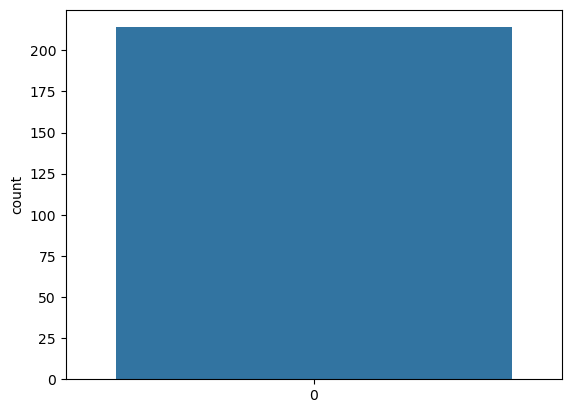

In [31]:
sns.countplot(df['Type of glass'])

RI


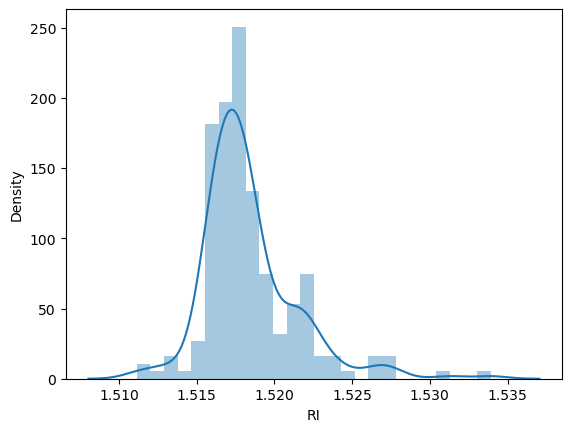

Na


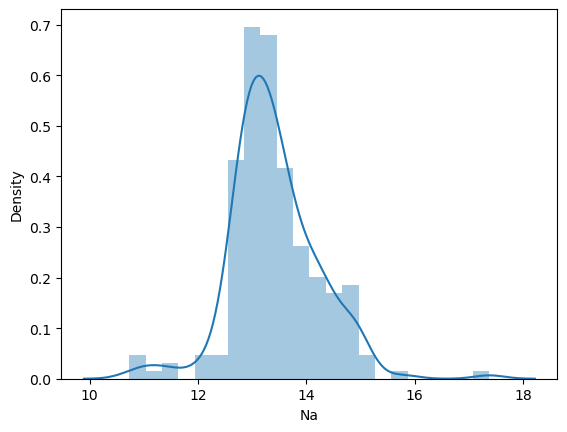

Mg


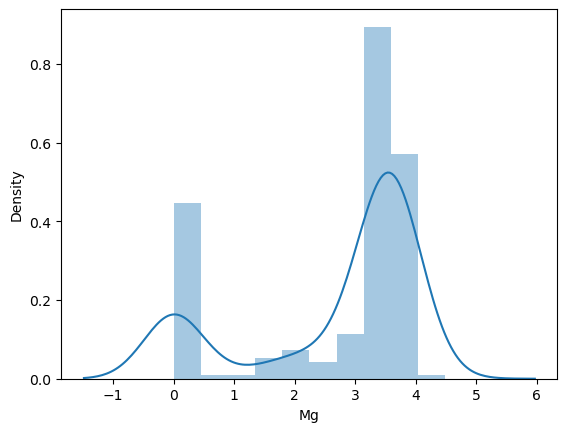

Al


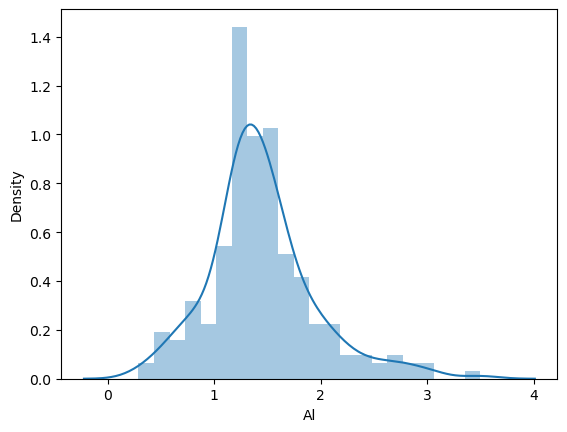

Si


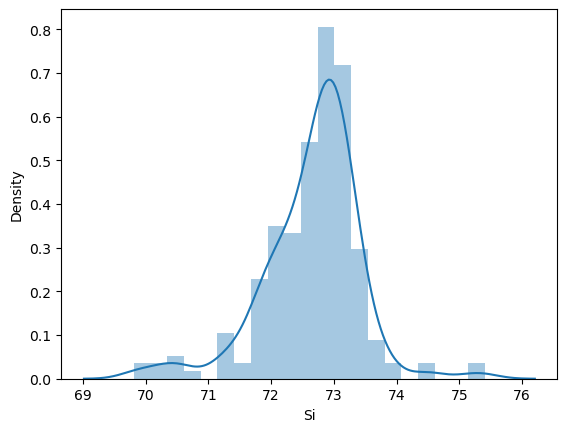

K


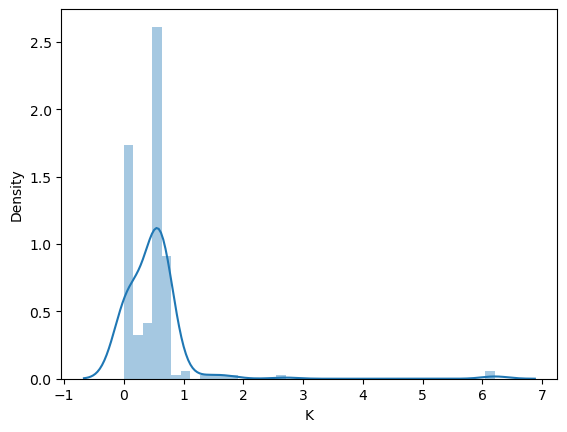

Ca


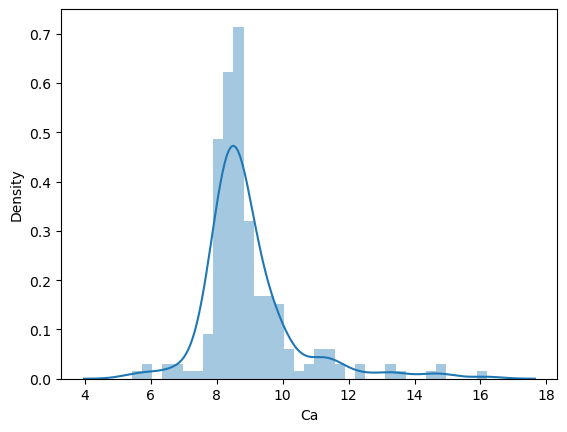

Ba


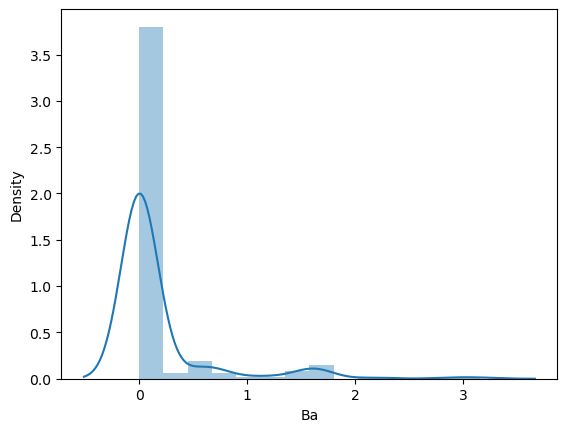

Fe


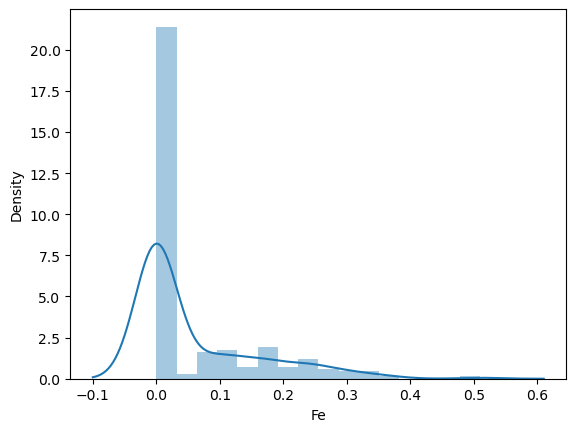

In [32]:
for x in df.drop(['Type of glass'],axis=1):
    print(x)
    plt.plot(figsize=(7,9))
    sns.distplot(df[x])
    plt.show()

In [33]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [34]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.134327
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.452336
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.758289
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.585928
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.148072
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053774
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.040670
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.523403
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.194903
Type of glass,-0.134327,0.452336,-0.758289,0.585928,0.148072,0.053774,0.040670,0.523403,-0.194903,1.000000


<Axes: >

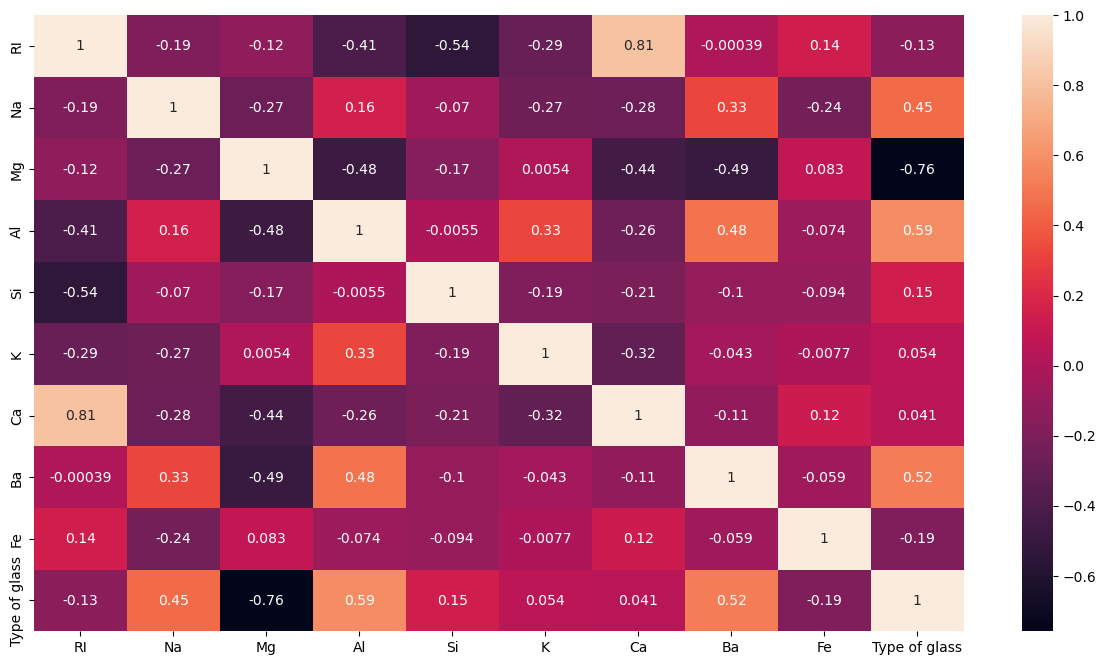

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [36]:
df.drop(['Type of glass'],axis=1).corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<Axes: >

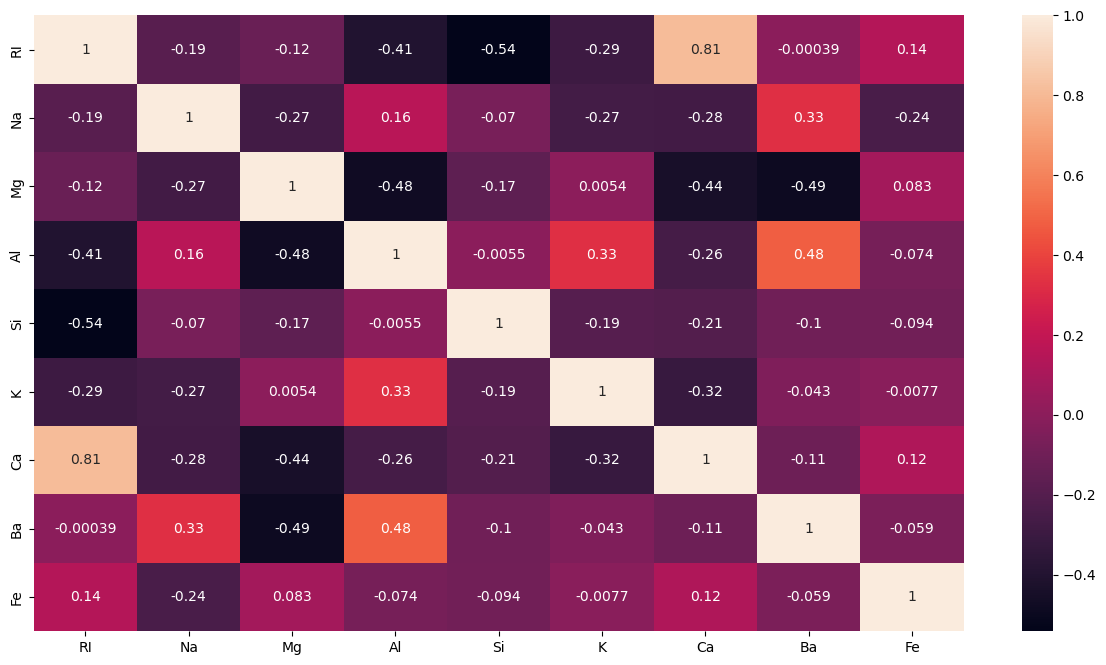

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.drop(['Type of glass'],axis=1).corr(),annot=True)

In [38]:
df.drop(['Type of glass'],axis=1).corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


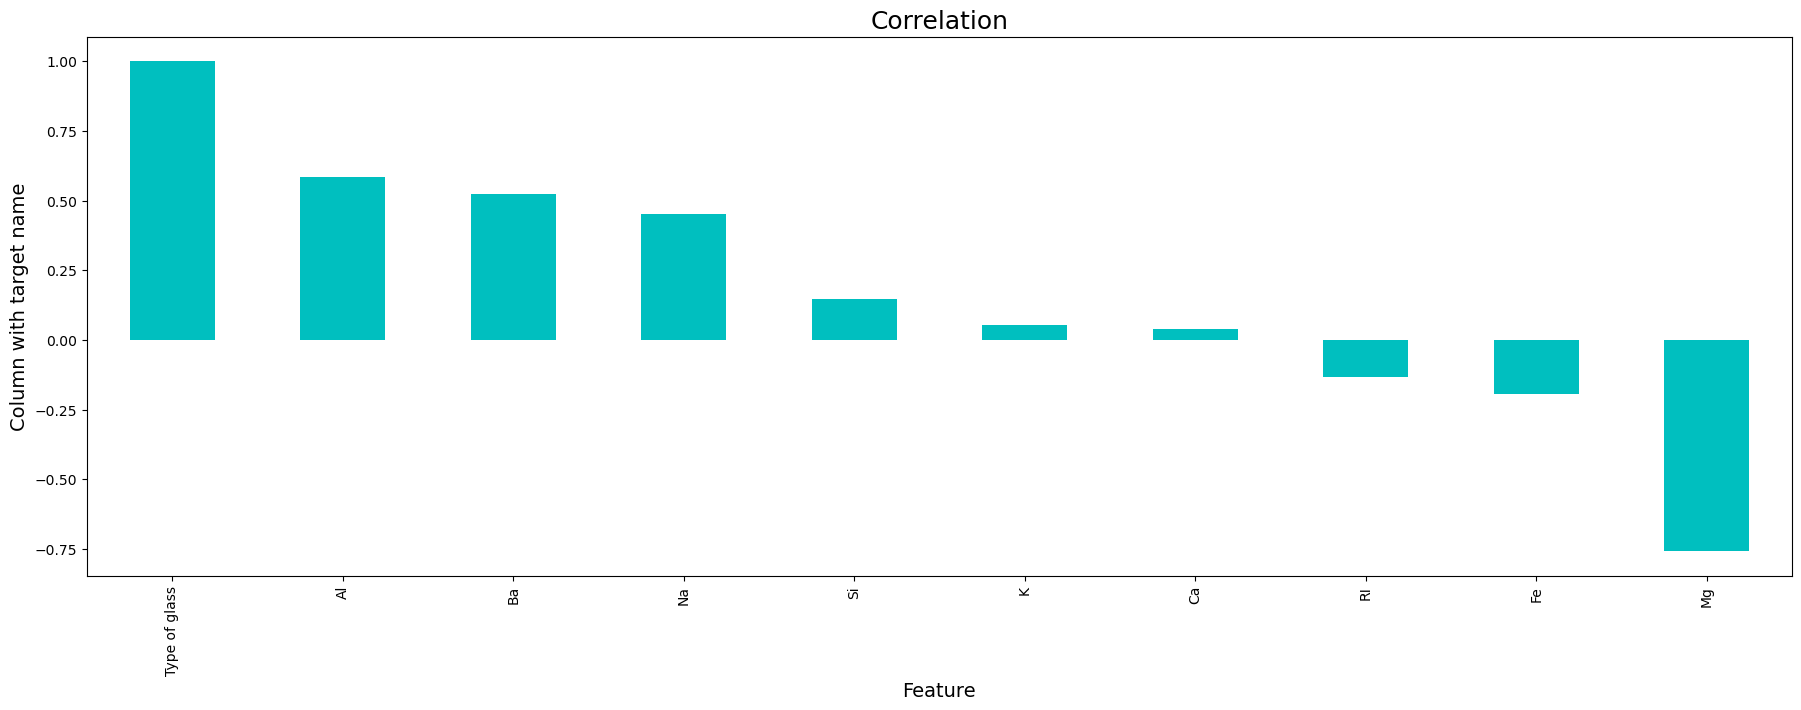

In [39]:
plt.figure(figsize=(22,7))
df.corr()['Type of glass'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target name',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

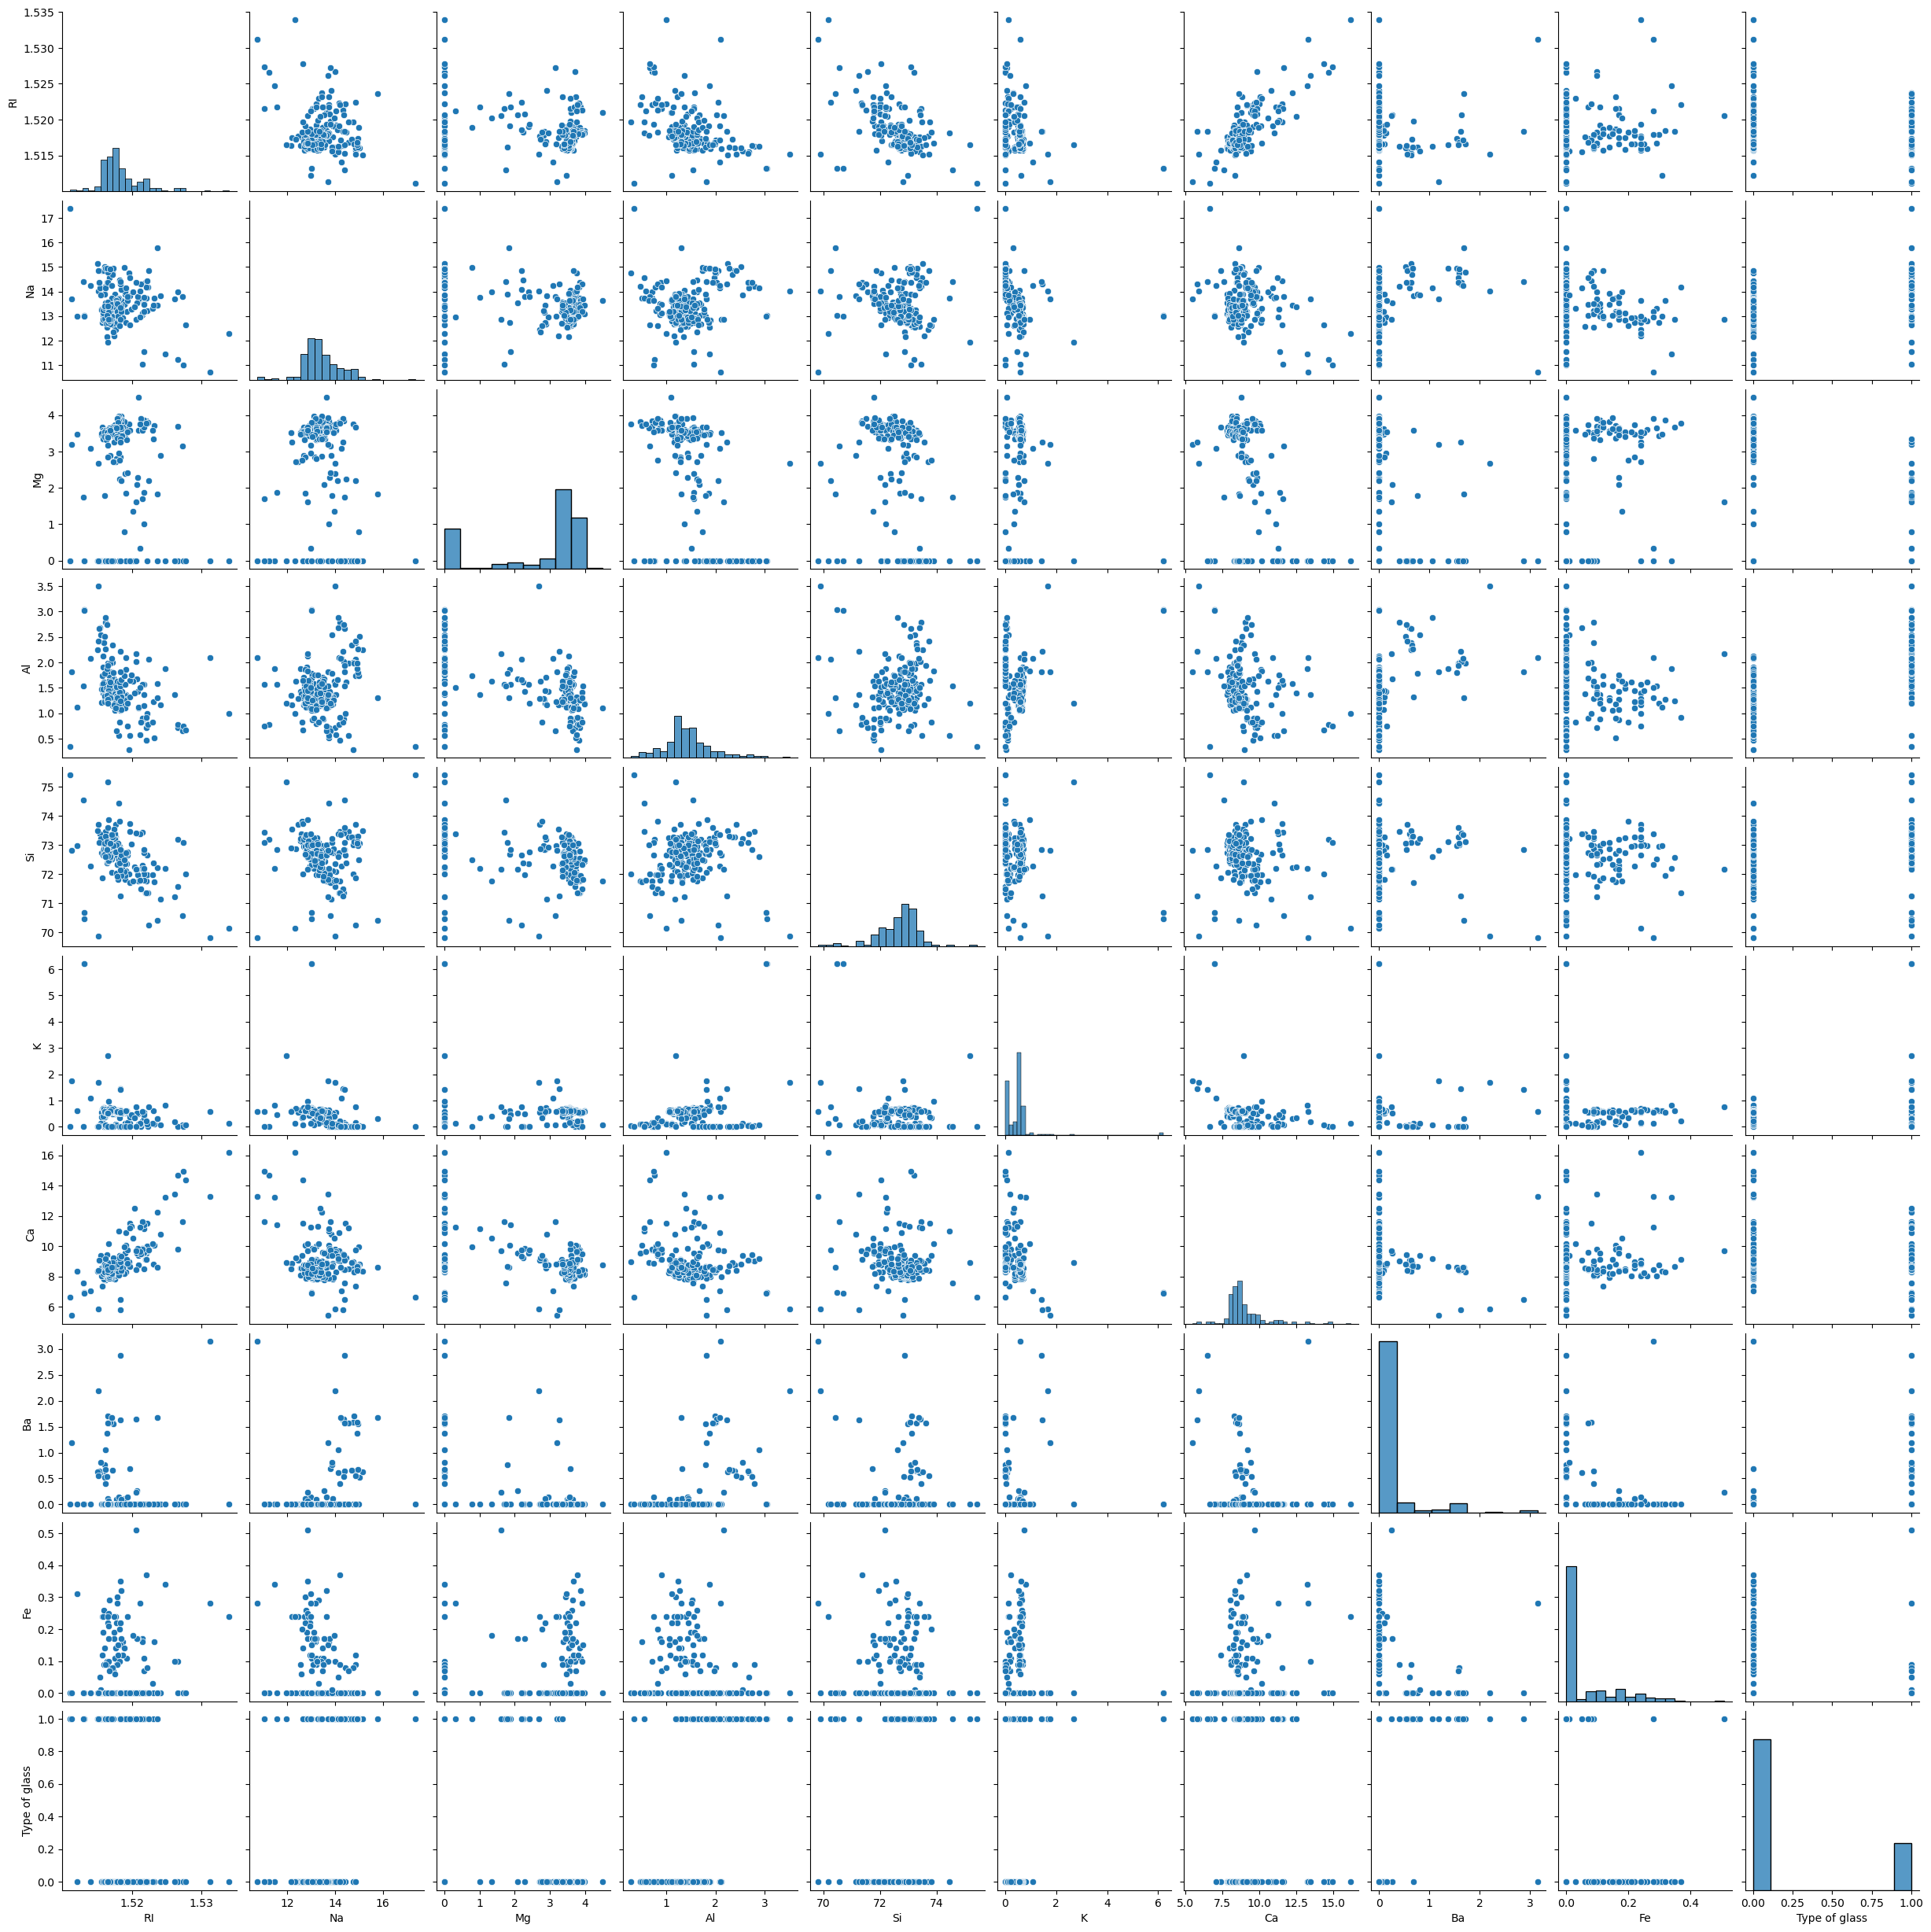

In [45]:
sns.pairplot(df)

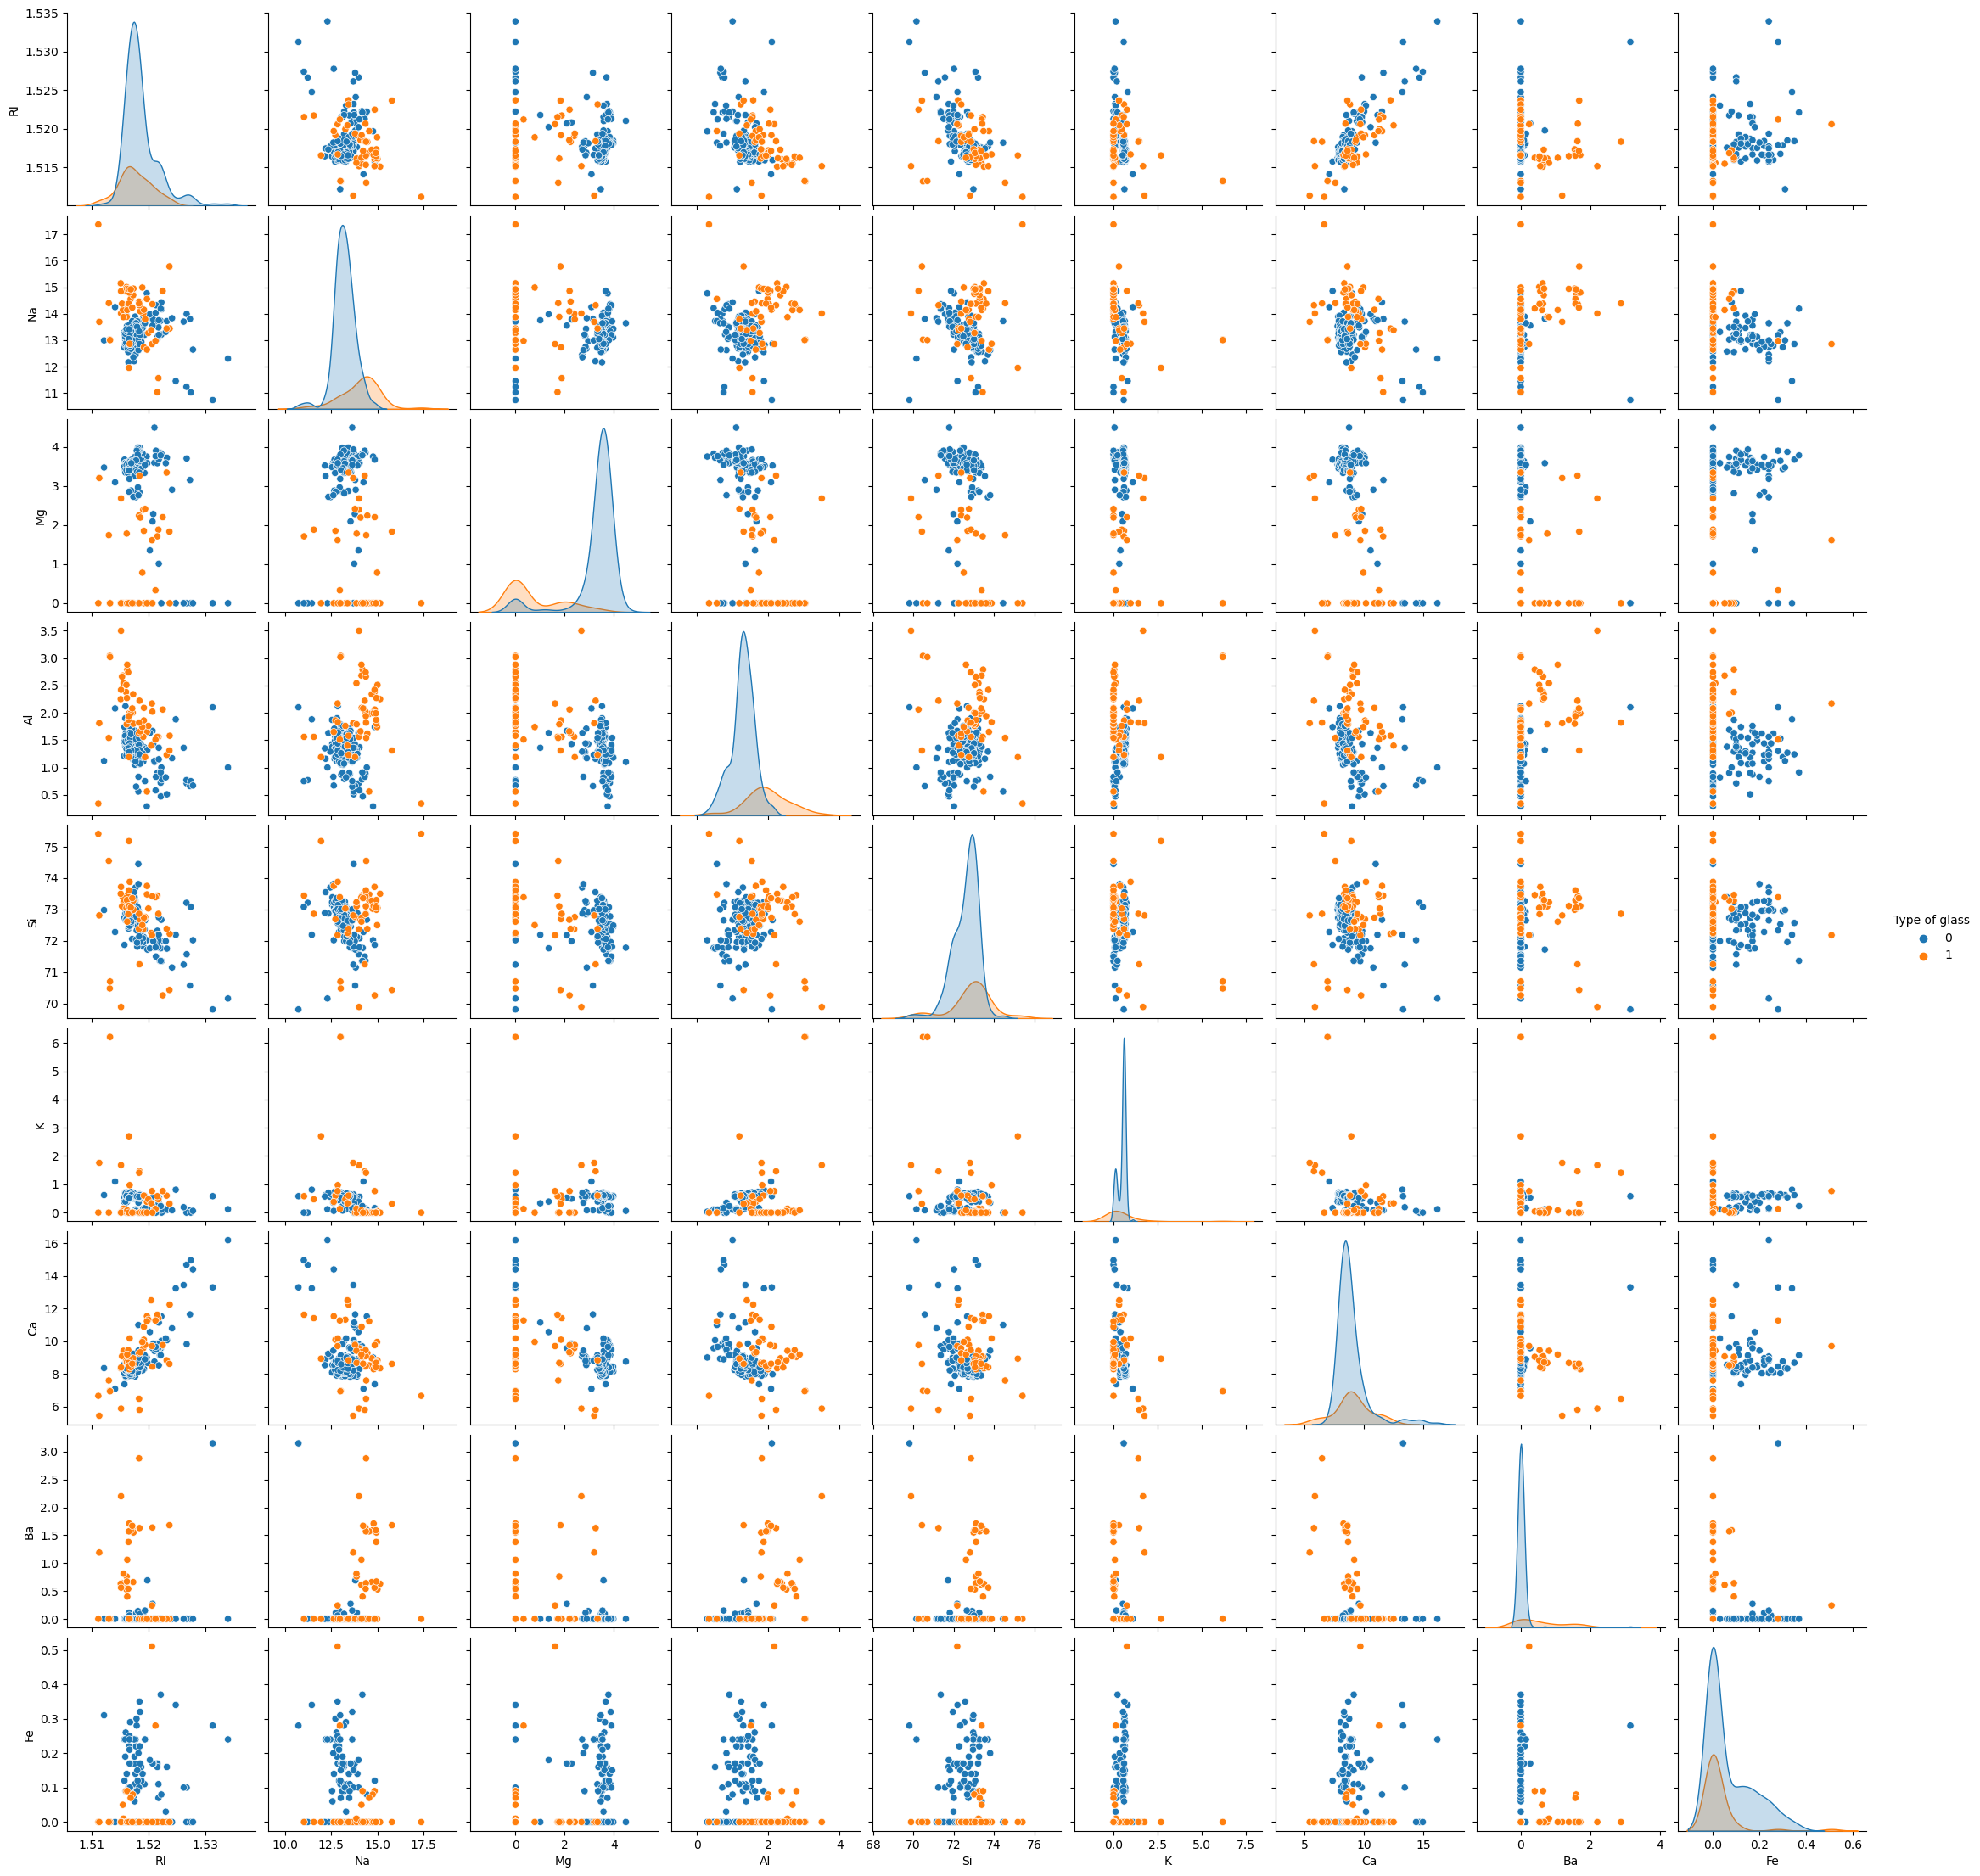

In [46]:
sns.pairplot(df,hue='Type of glass')

In [ ]:
RI:-The value of RI is between 1.5118 to 1.525
Na:-The value of Na is less than 15
Mg:-The value of Mg is between 2.9 to 4
Al:-The value of Al is less than 2
Si:-The value of Si is between 71 to 74.
Ba:-The value of Ba is less than 0.4
Fe:-The value of Fe is between 0.05 to 0.4
    
For produce non- Windows Glass parameters should be like this.

RI:-The value of RI is less than 1.525
Na:-The value of Na is between 13 to 15
Mg:-The value of Mg is less than 3.5
Al:-The value of Al is between 1.4 to 3
Si:-The value of Si is between 72 to 74
Ba:-The value of Ba is between 0.5 to 2
Fe:-The value of Fe is less 0.1

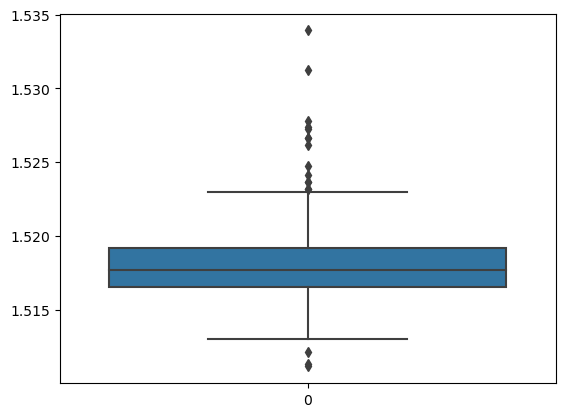

In [47]:
plt.plot(figsize=(6,4))
sns.boxplot(df['RI'])
plt.show()

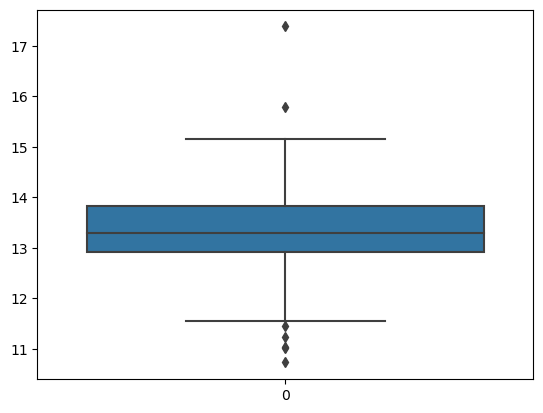

In [48]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Na'])
plt.show()

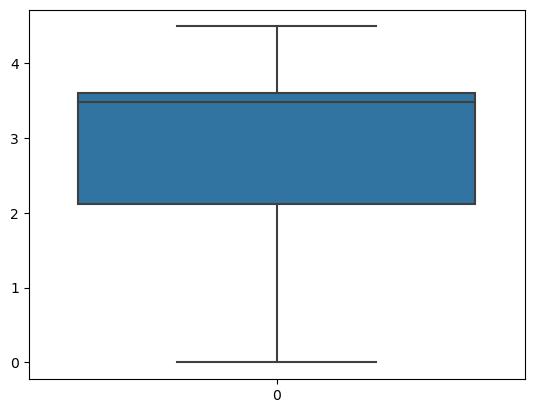

In [49]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Mg'])
plt.show()

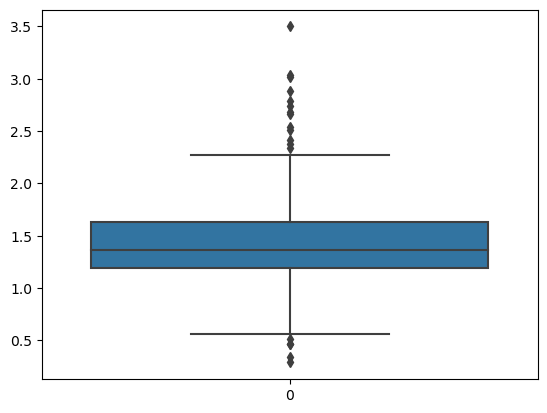

In [50]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Al'])
plt.show()

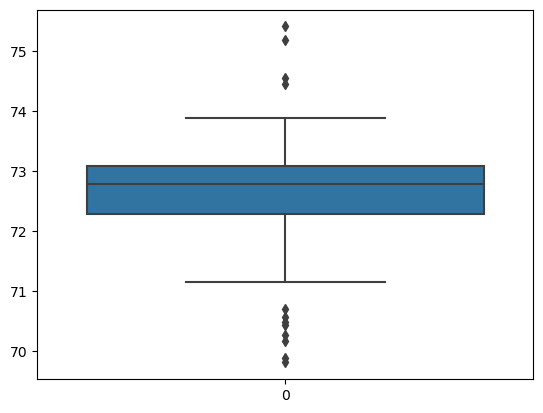

In [51]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Si'])
plt.show()


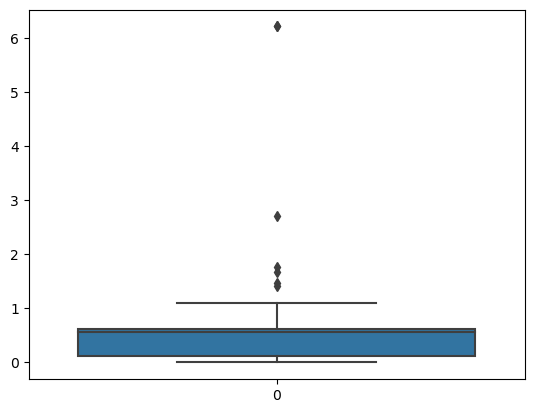

In [52]:
plt.plot(figsize=(6,4))
sns.boxplot(df['K'])
plt.show()

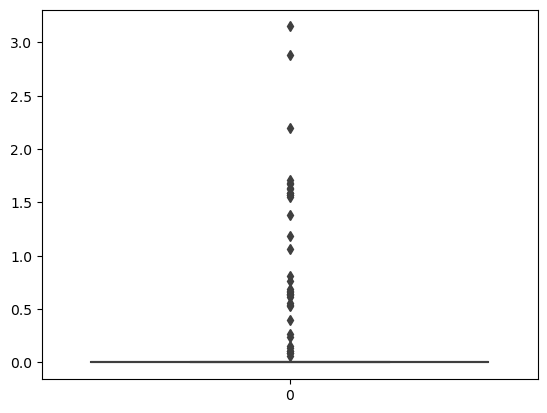

In [53]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Ba'])
plt.show()

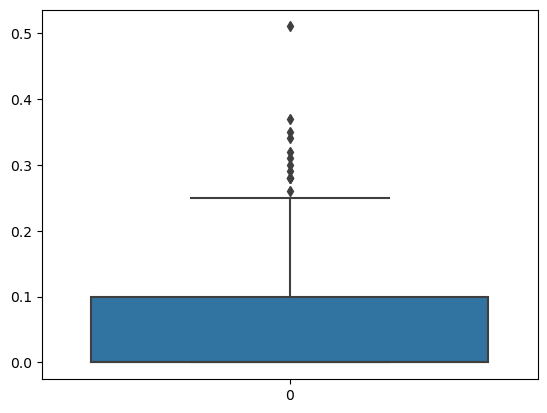

In [54]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Fe'])
plt.show()

In [55]:
df['Ba'].skew()

3.4164245693025577

In [56]:
x=df.drop(['Type of glass'],axis=1)
y=df['Type of glass']

In [57]:
x.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [58]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Type of glass, dtype: int64

In [59]:
x.shape

(214, 9)

In [60]:
y.shape

(214,)

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3

x=x[(z<3).all(axis=1)]
print(x.shape)

y=y[(z<3).all(axis=1)]
print(y.shape)

(194, 9)
(194,)


In [62]:
loss=round((214-198)/214*100,2)
loss

7.48

In [63]:
x.skew()

RI    0.952733
Na    0.371482
Mg   -1.528849
Al    0.658259
Si   -0.425450
K     0.303175
Ca    1.077962
Ba    3.188587
Fe    1.486479
dtype: float64

In [64]:
def skee(a):
    model=[np.sqrt(a),np.log(a),yeojohnson(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [65]:
def skeep(a):
    model=[np.sqrt(a),np.log(a),boxcox(a)[0],yeojohnson(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [66]:
skeep(x['RI'])

original skewness is: 0.9527325820305167


0.9418615896401636


0.9383732873618617


nan


nan




In [67]:
x['RI']=boxcox(x['RI'])[0]

In [68]:
skee(x['Mg'])

original skewness is: -1.5288487717139234


-1.7848390400264686


nan


-1.018058771416423




In [69]:
x['Mg']=yeojohnson(x['Mg'])[0]

In [70]:
skeep(x['Al'])

original skewness is: 0.6582585647285744


-0.09399250574091647


-0.9824203290650492


0.07689749306123686


0.01393348635512661




In [71]:
x['Al']=yeojohnson(x['Al'])[0]

In [72]:
skeep(x['Si'])

original skewness is: -0.4254496161043749


-0.4388667633791286


-0.45556092248419683


0.03614398969958533


0.03611490552288607




In [73]:
x['Si']=boxcox(x['Si'])[0]

In [74]:
skeep(x['Ca'])

original skewness is: 1.0779624383107076


0.7324429008432364


0.33394773765788327


-0.06292143631774906


-0.08110455954589937




In [75]:
x['Ca']=yeojohnson(x['Ca'])[0]

In [76]:
skee(x['Fe'])

original skewness is: 1.4864785625583121


1.0000750383488883


nan


0.8522011992669197




In [77]:
x['Fe']=yeojohnson(x['Fe'])[0]

In [78]:
x.skew()

RI    0.000000
Na    0.371482
Mg   -1.026009
Al    0.014042
Si    0.036426
K     0.303175
Ca   -0.081738
Ba    3.188587
Fe    0.858856
dtype: float64

<Axes: >

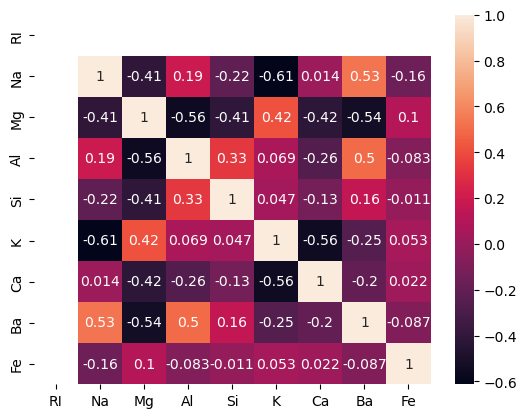

In [79]:
sns.heatmap(x.corr(),annot=True)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [82]:
vif_calc()

     VIF Factor features
0  4.883316e-30       RI
1  1.437860e-01       Na
2  8.170346e-01       Mg
3  1.091366e+00       Al
4  4.693416e+00       Si
5  9.869712e-01        K
6  2.773480e-02       Ca
7  1.011398e+00       Ba
8  9.926351e-01       Fe


In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.00000000e+00,  3.32126920e-01,  2.29506682e+00, ...,
         1.11819938e-03, -3.46292113e-01, -6.77737203e-01],
       [ 0.00000000e+00,  7.04397676e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -3.46292113e-01, -6.77737203e-01],
       [ 0.00000000e+00,  1.68327787e-01,  5.07711174e-01, ...,
        -1.11977966e+00, -3.46292113e-01, -6.77737203e-01],
       ...,
       [ 0.00000000e+00,  2.23815319e+00, -1.94767390e+00, ...,
        -3.81688285e-01,  4.11744651e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.40426670e+00, -1.94767390e+00, ...,
        -3.36777926e-01,  4.25781564e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.43404836e+00, -1.94767390e+00, ...,
        -2.92174639e-01,  4.06129885e+00, -6.77737203e-01]])

In [84]:
y.value_counts()

0    154
1     40
Name: Type of glass, dtype: int64

In [85]:
pip install --upgrade scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [87]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8      

In [88]:
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss

In [89]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [90]:
y.value_counts()

0    154
1    154
Name: Type of glass, dtype: int64

In [91]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25,stratify=y)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model perform very well')
        print('Random State = ',i)
        print("Training accuracy score is = ",accuracy_score(y_train,pred_train))
        print("Test accuracy score is = ",accuracy_score(y_test,pred_test))
        print('\n')

At random state 47 The model perform very well
Random State =  47
Training accuracy score is =  0.974025974025974
Test accuracy score is =  0.974025974025974


At random state 80 The model perform very well
Random State =  80
Training accuracy score is =  0.974025974025974
Test accuracy score is =  0.974025974025974


At random state 94 The model perform very well
Random State =  94
Training accuracy score is =  0.974025974025974
Test accuracy score is =  0.974025974025974


At random state 96 The model perform very well
Random State =  96
Training accuracy score is =  0.974025974025974
Test accuracy score is =  0.974025974025974


At random state 141 The model perform very well
Random State =  141
Training accuracy score is =  0.974025974025974
Test accuracy score is =  0.974025974025974


At random state 167 The model perform very well
Random State =  167
Training accuracy score is =  0.974025974025974
Test accuracy score is =  0.974025974025974


At random state 342 The model perfor

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=777,test_size=0.25,stratify=y)

In [93]:
y_train.value_counts()

0    116
1    115
Name: Type of glass, dtype: int64

In [94]:
y_test.value_counts()

1    39
0    38
Name: Type of glass, dtype: int64

In [95]:
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_lr)*100,'%',)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_lr))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_lr))

Accuracy of model = 98.7012987012987 %


Confusion matrix 
 [[38  0]
 [ 1 38]]


Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.99        39

    accuracy                           0.99        77
   macro avg       0.99      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77



In [96]:
from sklearn.model_selection import cross_val_score
pred_lr_ac=accuracy_score(y_test,pred_lr)
for i in range(2,15):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_lr_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 95.7792207792208
Accuracy score is = 98.7012987012987


At cv = 3
Cross validation score is = 95.7674979376864
Accuracy score is = 98.7012987012987


At cv = 4
Cross validation score is = 96.75324675324676
Accuracy score is = 98.7012987012987


At cv = 5
Cross validation score is = 96.74246430460073
Accuracy score is = 98.7012987012987


At cv = 6
Cross validation score is = 95.4374057315234
Accuracy score is = 98.7012987012987


At cv = 7
Cross validation score is = 96.75324675324674
Accuracy score is = 98.7012987012987


At cv = 8
Cross validation score is = 96.7442645074224
Accuracy score is = 98.7012987012987


At cv = 9
Cross validation score is = 96.1064425770308
Accuracy score is = 98.7012987012987


At cv = 10
Cross validation score is = 96.43010752688171
Accuracy score is = 98.7012987012987


At cv = 11
Cross validation score is = 96.42857142857142
Accuracy score is = 98.7012987012987


At cv = 12
Cross validation score is = 96.71794871794

In [97]:
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
bg=BaggingClassifier()
rfc=RandomForestClassifier()
ext=ExtraTreesClassifier()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [98]:
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_gb)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_gb))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_gb))

Accuracy of model = 92.20779220779221


Confusion matrix 
 [[35  3]
 [ 3 36]]


Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.92      0.92      0.92        39

    accuracy                           0.92        77
   macro avg       0.92      0.92      0.92        77
weighted avg       0.92      0.92      0.92        77



In [99]:
pred_gb_ac=accuracy_score(y_test,pred_gb)
for i in range(2,15):
    gsscore=cross_val_score(gb,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_gb_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 92.85714285714286
Accuracy score is = 92.20779220779221


At cv = 3
Cross validation score is = 92.85804936861476
Accuracy score is = 92.20779220779221


At cv = 4
Cross validation score is = 95.45454545454545
Accuracy score is = 92.20779220779221


At cv = 5
Cross validation score is = 97.07562136435747
Accuracy score is = 92.20779220779221


At cv = 6
Cross validation score is = 95.11689291101057
Accuracy score is = 92.20779220779221


At cv = 7
Cross validation score is = 95.7792207792208
Accuracy score is = 92.20779220779221


At cv = 8
Cross validation score is = 96.40688259109312
Accuracy score is = 92.20779220779221


At cv = 9
Cross validation score is = 96.42390289449112
Accuracy score is = 92.20779220779221


At cv = 10
Cross validation score is = 96.10752688172045
Accuracy score is = 92.20779220779221


At cv = 11
Cross validation score is = 95.45454545454545
Accuracy score is = 92.20779220779221


At cv = 12
Cross validation score is = 

In [100]:
ada.fit(x_train,y_train)
pred_ada=ada.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_ada)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_ada))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_ada))

Accuracy of model = 94.8051948051948


Confusion matrix 
 [[37  1]
 [ 3 36]]


Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.97      0.92      0.95        39

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77



In [101]:
pred_ada_ac=accuracy_score(y_test,pred_ada)
for i in range(2,15):
    adasscore=cross_val_score(ada,x,y,cv=i)
    adasc=adasscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',adasc*100)
    print('Accuracy score is =',pred_ada_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 94.8051948051948
Accuracy score is = 94.8051948051948


At cv = 3
Cross validation score is = 91.887175582207
Accuracy score is = 94.8051948051948


At cv = 4
Cross validation score is = 92.53246753246754
Accuracy score is = 94.8051948051948


At cv = 5
Cross validation score is = 93.4902168164992
Accuracy score is = 94.8051948051948


At cv = 6
Cross validation score is = 92.52765208647563
Accuracy score is = 94.8051948051948


At cv = 7
Cross validation score is = 92.85714285714288
Accuracy score is = 94.8051948051948


At cv = 8
Cross validation score is = 94.45006747638327
Accuracy score is = 94.8051948051948


At cv = 9
Cross validation score is = 93.828197945845
Accuracy score is = 94.8051948051948


At cv = 10
Cross validation score is = 93.20430107526882
Accuracy score is = 94.8051948051948


At cv = 11
Cross validation score is = 93.18181818181817
Accuracy score is = 94.8051948051948


At cv = 12
Cross validation score is = 93.5
Accuracy s

In [102]:
lsscore_selected=cross_val_score(ada,x,y,cv=4)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','Accuracy score =',pred_ada_ac*100)

Cross validation score = 92.53246753246754 
 Accuracy score = 94.8051948051948


In [103]:
bg.fit(x_train,y_train)
pred_bg=bg.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_bg)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_bg))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_bg))

Accuracy of model = 93.5064935064935


Confusion matrix 
 [[37  1]
 [ 4 35]]


Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.97      0.90      0.93        39

    accuracy                           0.94        77
   macro avg       0.94      0.94      0.94        77
weighted avg       0.94      0.94      0.93        77



In [104]:
pred_bg_ac=accuracy_score(y_test,pred_bg)
for i in range(2,15):
    bgsscore=cross_val_score(bg,x,y,cv=i)
    bgsc=bgsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',bgsc*100)
    print('Accuracy score is =',pred_bg_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 94.48051948051948
Accuracy score is = 93.5064935064935


At cv = 3
Cross validation score is = 93.50529855955327
Accuracy score is = 93.5064935064935


At cv = 4
Cross validation score is = 93.5064935064935
Accuracy score is = 93.5064935064935


At cv = 5
Cross validation score is = 95.43627710206242
Accuracy score is = 93.5064935064935


At cv = 6
Cross validation score is = 94.78381096028156
Accuracy score is = 93.5064935064935


At cv = 7
Cross validation score is = 94.80519480519482
Accuracy score is = 93.5064935064935


At cv = 8
Cross validation score is = 95.4284750337382
Accuracy score is = 93.5064935064935


At cv = 9
Cross validation score is = 94.48179271708683
Accuracy score is = 93.5064935064935


At cv = 10
Cross validation score is = 95.46236559139786
Accuracy score is = 93.5064935064935


At cv = 11
Cross validation score is = 96.42857142857143
Accuracy score is = 93.5064935064935


At cv = 12
Cross validation score is = 94.46153846

In [105]:
lsscore_selected=cross_val_score(bg,x,y,cv=4)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','Accuracy score =',pred_bg_ac*100)

Cross validation score = 93.5064935064935 
 Accuracy score = 93.5064935064935


In [106]:
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_rfc)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_rfc))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_rfc))

Accuracy of model = 94.8051948051948


Confusion matrix 
 [[37  1]
 [ 3 36]]


Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.97      0.92      0.95        39

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77



In [107]:
pred_rfc_ac=accuracy_score(y_test,pred_rfc)
for i in range(2,15):
    gsscore=cross_val_score(rfc,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_rfc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 95.45454545454545
Accuracy score is = 94.8051948051948


At cv = 3
Cross validation score is = 96.0942953233073
Accuracy score is = 94.8051948051948


At cv = 4
Cross validation score is = 96.1038961038961
Accuracy score is = 94.8051948051948


At cv = 5
Cross validation score is = 96.40930724484399
Accuracy score is = 94.8051948051948


At cv = 6
Cross validation score is = 96.41151332327803
Accuracy score is = 94.8051948051948


At cv = 7
Cross validation score is = 96.75324675324676
Accuracy score is = 94.8051948051948


At cv = 8
Cross validation score is = 96.39844804318489
Accuracy score is = 94.8051948051948


At cv = 9
Cross validation score is = 96.41456582633052
Accuracy score is = 94.8051948051948


At cv = 10
Cross validation score is = 96.10752688172045
Accuracy score is = 94.8051948051948


At cv = 11
Cross validation score is = 96.75324675324674
Accuracy score is = 94.8051948051948


At cv = 12
Cross validation score is = 96.38461538

In [108]:
gsscore_selected=cross_val_score(rfc,x,y,cv=13)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_rfc_ac*100)

Cross validation score = 96.72519509476031 
 Accuracy score = 94.8051948051948


In [109]:
ext.fit(x_train,y_train)
pred_ext=ext.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_ext)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_ext))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_ext))

Accuracy of model = 97.40259740259741


Confusion matrix 
 [[38  0]
 [ 2 37]]


Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.95      0.97        39

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77



In [110]:
pred_ext_ac=accuracy_score(y_test,pred_ext)
for i in range(2,15):
    gsscore=cross_val_score(ext,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_ext_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 96.42857142857143
Accuracy score is = 97.40259740259741


At cv = 3
Cross validation score is = 97.06834189986674
Accuracy score is = 97.40259740259741


At cv = 4
Cross validation score is = 97.40259740259741
Accuracy score is = 97.40259740259741


At cv = 5
Cross validation score is = 97.71549444738234
Accuracy score is = 97.40259740259741


At cv = 6
Cross validation score is = 97.7187028657617
Accuracy score is = 97.40259740259741


At cv = 7
Cross validation score is = 97.72727272727273
Accuracy score is = 97.40259740259741


At cv = 8
Cross validation score is = 97.70580296896087
Accuracy score is = 97.40259740259741


At cv = 9
Cross validation score is = 97.06816059757234
Accuracy score is = 97.40259740259741


At cv = 10
Cross validation score is = 98.3763440860215
Accuracy score is = 97.40259740259741


At cv = 11
Cross validation score is = 98.05194805194806
Accuracy score is = 97.40259740259741


At cv = 12
Cross validation score is = 9

In [111]:
gsscore_selected=cross_val_score(ext,x,y,cv=2)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_ext_ac*100)

Cross validation score = 96.75324675324676 
 Accuracy score = 97.40259740259741


In [112]:
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_gnb)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_gnb))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_gnb))

Accuracy of model = 97.40259740259741


Confusion matrix 
 [[37  1]
 [ 1 38]]


Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.97      0.97      0.97        39

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



In [113]:
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_svc)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_svc))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_svc))

Accuracy of model = 98.7012987012987


Confusion matrix 
 [[37  1]
 [ 0 39]]


Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.99        39

    accuracy                           0.99        77
   macro avg       0.99      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77



In [114]:
pred_svc_ac=accuracy_score(y_test,pred_svc)
for i in range(2,15):
    gsscore=cross_val_score(svc,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_svc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 97.40259740259741
Accuracy score is = 98.7012987012987


At cv = 3
Cross validation score is = 97.06516910971509
Accuracy score is = 98.7012987012987


At cv = 4
Cross validation score is = 98.05194805194805
Accuracy score is = 98.7012987012987


At cv = 5
Cross validation score is = 97.7102062400846
Accuracy score is = 98.7012987012987


At cv = 6
Cross validation score is = 97.7187028657617
Accuracy score is = 98.7012987012987


At cv = 7
Cross validation score is = 98.05194805194806
Accuracy score is = 98.7012987012987


At cv = 8
Cross validation score is = 97.70580296896087
Accuracy score is = 98.7012987012987


At cv = 9
Cross validation score is = 98.04855275443512
Accuracy score is = 98.7012987012987


At cv = 10
Cross validation score is = 97.72043010752688
Accuracy score is = 98.7012987012987


At cv = 11
Cross validation score is = 97.72727272727273
Accuracy score is = 98.7012987012987


At cv = 12
Cross validation score is = 97.69230769

In [115]:
pred_gnb_ac=accuracy_score(y_test,pred_gnb)
for i in range(2,15):
    gsscore=cross_val_score(gnb,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_gnb_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 96.1038961038961
Accuracy score is = 97.40259740259741


At cv = 3
Cross validation score is = 96.09746811345899
Accuracy score is = 97.40259740259741


At cv = 4
Cross validation score is = 96.75324675324676
Accuracy score is = 97.40259740259741


At cv = 5
Cross validation score is = 96.09201480698044
Accuracy score is = 97.40259740259741


At cv = 6
Cross validation score is = 96.41779788838613
Accuracy score is = 97.40259740259741


At cv = 7
Cross validation score is = 96.75324675324674
Accuracy score is = 97.40259740259741


At cv = 8
Cross validation score is = 96.7442645074224
Accuracy score is = 97.40259740259741


At cv = 9
Cross validation score is = 96.75070028011203
Accuracy score is = 97.40259740259741


At cv = 10
Cross validation score is = 96.75268817204301
Accuracy score is = 97.40259740259741


At cv = 11
Cross validation score is = 96.75324675324674
Accuracy score is = 97.40259740259741


At cv = 12
Cross validation score is = 9

In [116]:
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_dtc)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_dtc))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_dtc))

Accuracy of model = 90.9090909090909


Confusion matrix 
 [[35  3]
 [ 4 35]]


Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.92      0.90      0.91        39

    accuracy                           0.91        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.91      0.91      0.91        77



In [117]:
pred_dtc_ac=accuracy_score(y_test,pred_dtc)
for i in range(2,15):
    gsscore=cross_val_score(dtc,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_dtc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 94.48051948051948
Accuracy score is = 90.9090909090909


At cv = 3
Cross validation score is = 91.56037819658607
Accuracy score is = 90.9090909090909


At cv = 4
Cross validation score is = 93.5064935064935
Accuracy score is = 90.9090909090909


At cv = 5
Cross validation score is = 96.09730301427814
Accuracy score is = 90.9090909090909


At cv = 6
Cross validation score is = 93.50804424333838
Accuracy score is = 90.9090909090909


At cv = 7
Cross validation score is = 94.15584415584416
Accuracy score is = 90.9090909090909


At cv = 8
Cross validation score is = 94.78744939271255
Accuracy score is = 90.9090909090909


At cv = 9
Cross validation score is = 94.18300653594771
Accuracy score is = 90.9090909090909


At cv = 10
Cross validation score is = 93.84946236559139
Accuracy score is = 90.9090909090909


At cv = 11
Cross validation score is = 94.15584415584416
Accuracy score is = 90.9090909090909


At cv = 12
Cross validation score is = 94.1153846

In [118]:
gsscore_selected=cross_val_score(dtc,x,y,cv=10)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_dtc_ac*100)

Cross validation score = 94.16129032258065 
 Accuracy score = 90.9090909090909


In [119]:
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_knn)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_knn))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_knn))

Accuracy of model = 100.0


Confusion matrix 
 [[38  0]
 [ 0 39]]


Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        39

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [120]:
pred_knn_ac=accuracy_score(y_test,pred_knn)
for i in range(2,25):
    gsscore=cross_val_score(knn,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_knn_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 96.75324675324674
Accuracy score is = 100.0


At cv = 3
Cross validation score is = 97.71876388095691
Accuracy score is = 100.0


At cv = 4
Cross validation score is = 98.05194805194805
Accuracy score is = 100.0


At cv = 5
Cross validation score is = 97.71549444738234
Accuracy score is = 100.0


At cv = 6
Cross validation score is = 97.7187028657617
Accuracy score is = 100.0


At cv = 7
Cross validation score is = 98.05194805194806
Accuracy score is = 100.0


At cv = 8
Cross validation score is = 97.70580296896087
Accuracy score is = 100.0


At cv = 9
Cross validation score is = 97.7217553688142
Accuracy score is = 100.0


At cv = 10
Cross validation score is = 98.04301075268818
Accuracy score is = 100.0


At cv = 11
Cross validation score is = 97.72727272727273
Accuracy score is = 100.0


At cv = 12
Cross validation score is = 97.37179487179488
Accuracy score is = 100.0


At cv = 13
Cross validation score is = 97.71460423634338
Accuracy score is 

In [121]:
grid_paramb={
    
    'verbose':[0,1,2,3,4,5],
    'n_estimators' : [10,20,30,40,50],
    'max_samples' :[1,1.1,1.2,1.3,0.1,0.2,0.3],
    'max_features' : [1,1.1,1.2,1.3,0.1,0.2,0.3],
    'random_state' :['None',10,20,30,40,50,60,70,80,90,100]
}

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
gd_srb=GridSearchCV(estimator=bg,n_jobs=-1,
                  param_grid=grid_paramb,
                  scoring='accuracy',
                  cv=4)

In [ ]:
gd_srb.fit(x,y)

In [ ]:
GridSearchCV(cv=4, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 1.1, 1.2, 1.3, 0.1, 0.2, 0.3],
                         'max_samples': [1, 1.1, 1.2, 1.3, 0.1, 0.2, 0.3],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'random_state': ['None', 10, 20, 30, 40, 50, 60, 70,
                                          80, 90, 100],
                         'verbose': [0, 1, 2, 3, 4, 5]},
             scoring='accuracy')

In [ ]:
best_parameters=gd_srb.best_params_
print(best_parameters)
best_result=gd_srb.best_score_
print(best_result*100)

In [ ]:
grid_paramn={
    
    'n_neighbors':[3,4,5,6,7,8,9,10],
    'weights' : ['uniform','distance'],
    'algorithm' :['auto','ball_tree','kd_tree','brute'],
    'leaf_size' : [20,30,40,10,50],
    'p' :[1,2,3,4,5]
}

In [ ]:
gd_srkn=GridSearchCV(estimator=knn,n_jobs=-1,
                  param_grid=grid_paramn,
                  scoring='accuracy',
                  cv=4)

In [ ]:
gd_srkn.fit(x,y)

In [ ]:
GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 10, 50],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_parameters=gd_srkn.best_params_
print(best_parameters)
best_result=gd_srkn.best_score_
print(best_result*100)

In [ ]:
bggg=BaggingClassifier(max_features=0.3,max_samples=0.3,n_estimators=20,random_state=40,verbose=0)

In [ ]:
bggg.fit(x_train,y_train)
pred_bggg=bggg.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_bggg)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_bggg))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_bggg))

In [ ]:
pred_bggg=accuracy_score(y_test,pred_bggg)
for i in range(2,15):
    lsscore=cross_val_score(bggg,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_bggg*100)
    print('\n')

In [ ]:
lsscore_selected=cross_val_score(bggg,x,y,cv=5)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','Accuracy score =',pred_bggg*100)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='auto',leaf_size=20,p=3,weights='distance')

In [ ]:
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_knn)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_knn))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_knn))

In [ ]:
pred_knn_ac=accuracy_score(y_test,pred_knn)
for i in range(2,25):
    gsscore=cross_val_score(knn,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_knn_ac*100)
    print('\n')

In [ ]:
gsscore_selected=cross_val_score(knn,x,y,cv=14)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_knn_ac*100)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

In [ ]:
import joblib
joblib.dump(knn,'KNeighborsClassifierGlass.obj')

In [ ]:
                  #Thank You